C:\Users\prajw\AppData\Local\Temp\ipykernel_26620\746150903.py:47: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Classifier Performance:
Accuracy: 0.54
Precision: 0.19
Recall: 0.66
Quantum Circuit Depth: 1
Classical Logistic Regression Accuracy: 0.865625
Random Forest Accuracy: 0.90625


c:\Users\prajw\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_aer\noise\noise_model.py:378: UserWarning: Qiskit backend AerSimulator('aer_simulator') has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


Quantum Classifier Accuracy with Noise: 0.54375


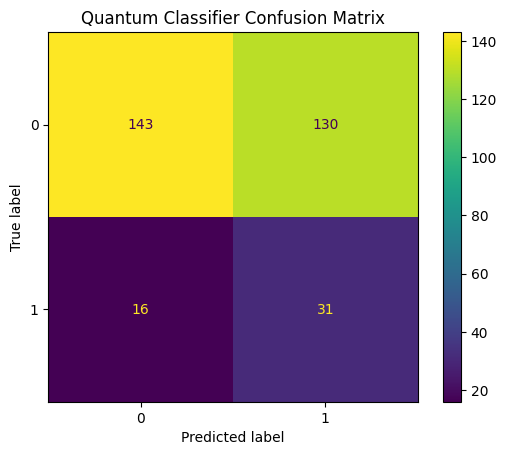

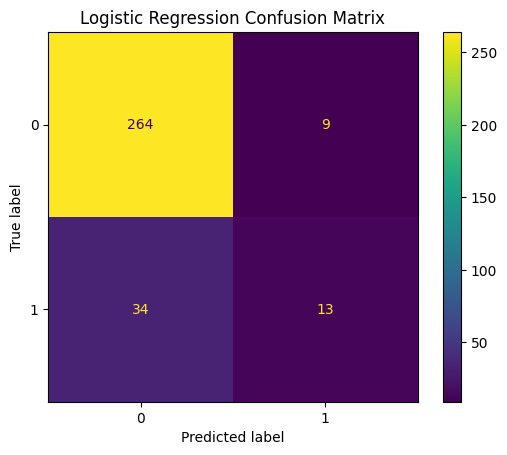

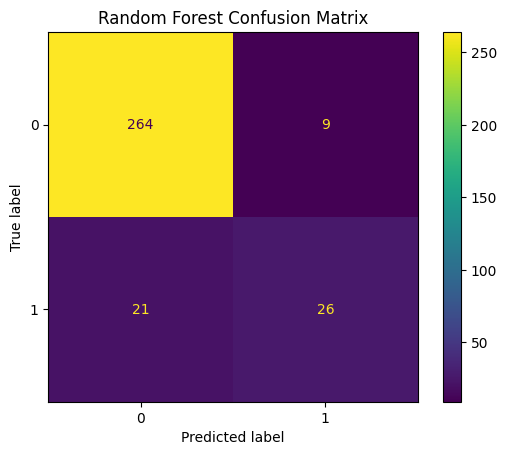

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from qiskit_aer import Aer,AerSimulator
from qiskit.primitives import Sampler
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer.noise import NoiseModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


file_path = r'C:\Stored\All Files\Coding\Hackathons\Quantum_Hackathon[7-01-2025]/dataset.csv'
dataset = pd.read_csv(file_path)


dataset['quality'] = (dataset['quality'] > 6).astype(int)


assert not dataset.isnull().values.any(), "Dataset contains missing values!"


X = dataset.iloc[:, :-1].values  
y = dataset['quality'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)


ansatz = RealAmplitudes(num_qubits=X_train.shape[1], reps=2)


optimizer = COBYLA(maxiter=100)
sampler = Sampler()
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=optimizer,
          sampler=sampler)


vqc.fit(X_train, y_train)


y_pred = vqc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Quantum Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


print("Quantum Circuit Depth:", ansatz.depth())

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_classical = log_reg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_classical = accuracy_score(y_test, y_pred_classical)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Classical Logistic Regression Accuracy:", accuracy_classical)
print("Random Forest Accuracy:", accuracy_rf)


noise_model = NoiseModel.from_backend(AerSimulator())
vqc.fit(X_train, y_train) 
y_pred_noisy = vqc.predict(X_test)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)

print("Quantum Classifier Accuracy with Noise:", accuracy_noisy)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Quantum Classifier Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classical)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()
